## Homework 1

Please, use your name as a part of the file name with answers. Upload your homework notebooks to ILIAS before the next lecture.
We recommend solving the theoretical exercises inside the notebook, which will improve your Latex skills. Alternatively, submit the theoretical exercises as pdf.

In [1]:
from IPython.display import display, Math, Latex

# Libraries you might need
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
# You can use this function for plotting raster plots (spikes), or you can use your own defined function
def raster(event_times_list, color = "k", t_max = 10., ax = None):
    """
    Creates a raster plot
    Parameters
    ----------
    event_times_list : iterable
                       a list of event time iterables
    color : string
            color of vlines
    Returns
    -------
    ax : an axis containing the raster plot
    https://scimusing.wordpress.com/2013/05/06/making-raster-plots-in-python-with-matplotlib/
    """
    if ax is None:
        ax = plt.gca()
    for ith, trial in enumerate(event_times_list):
        ax.vlines(trial, ith + .5, ith + 1.5, color = color)
    ax.set_ylim(.5, len(event_times_list) + .5)
    ax.set_yticks([])
    ax.set_ylabel("Spike train")
    ax.set_xlim((0, t_max))
    ax.set_xlabel("Time [s]")
    return ax

1) Take interval [0,10 sec]. We will simulate spikes within this interval to form a Poisson spike train. To do so we are going to use exponential distribution for inter-spike intervals. First spike-time (relative to time 0) is drawn from the exponential distribution with parameter $\tau$ , thus $t_1 \sim Exp(\tau) = 1/\tau e^{-t_1/\tau}$. All subsequent spikes are determined relative to the previous via $t_{k+1} = t_k + \Delta t$ with $\Delta t \sim Exp(\tau)$. Stop when the new spike-time exceed 10 sec. (1.5 points per each sub-task, tasks with a "*" give additional points)

In [3]:
# def random_exponential(tau):
#     x = np.random.rand()
#     return 1 / tau * np.exp(-x / tau)

def random_exponential(tau):
    return np.random.exponential(tau)

In [4]:
def single_poisson_spike_train(tau, length):
    t = [np.random.exponential(tau)]
    delta_t = np.random.exponential(tau)

    while t[-1] + delta_t < length:
        t.append(t[-1] + delta_t)
        delta_t = random_exponential(tau)

    return t

In [5]:
def poisson_spike_train(tau, length, n_trials = 1):
    return [single_poisson_spike_train(tau = tau, length = length) for _ in range(n_trials)]

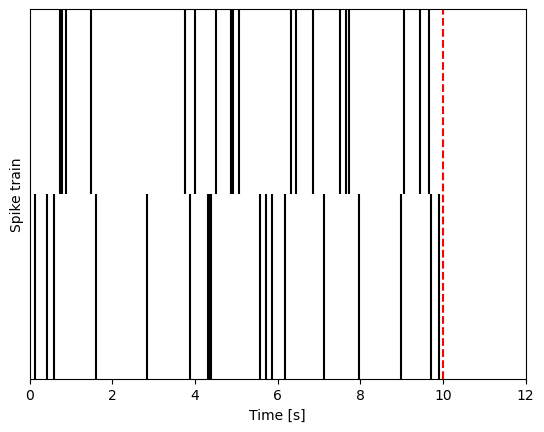

In [6]:
# test
np.random.seed(54165)  # Ensure reproducibility

spike_times = poisson_spike_train(tau = 0.5, length = 10, n_trials = 2)
ax = raster(spike_times, t_max = 12)
ax.axvline(10, linestyle = "--", color = "r")
plt.show()

a) Plot one spike train for each of the following parameter values: $\tau = 1$sec, $\tau = 0.1$sec, $\tau = 0.01$sec

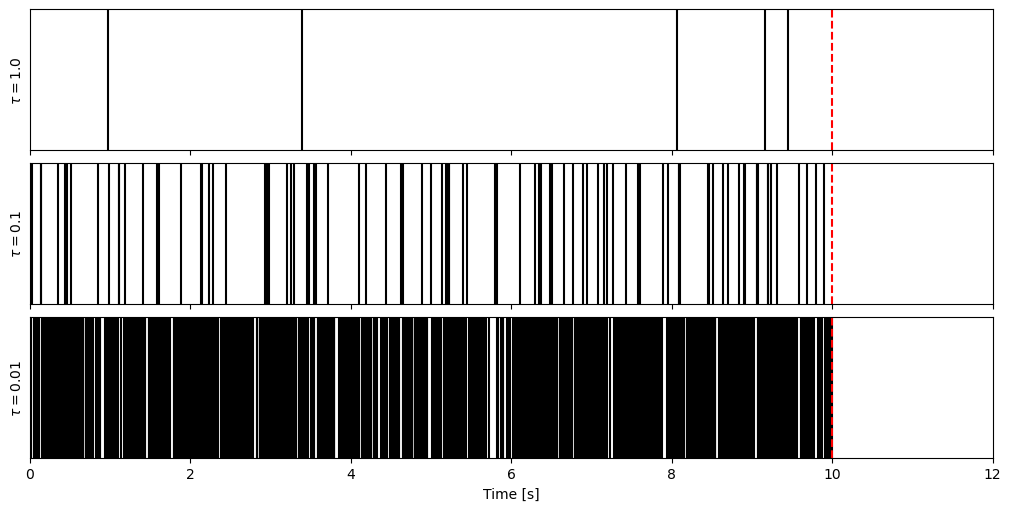

In [7]:
length = 10
taus = [1., 0.1, 0.01]

fig, axs = plt.subplots(nrows = len(taus), figsize = (10, 5), sharex = True, constrained_layout = True)
for tau, ax in zip(taus, axs):
    spike_times = poisson_spike_train(tau = tau, length = length)
    raster(spike_times, t_max = 12, ax = ax)
    ax.axvline(10, linestyle = "--", color = "r")
    ax.set_ylabel(r"$\tau =$" + str(tau))
    ax.set_xlabel('')
axs[-1].set_xlabel("Time [s]")
plt.show()

b) Simulate 50.000 spike trains for each parameter in a) and compute the total number of spikes (i.e. the “spike count”) for each. Plot a histogram over the spike counts for each of the three conditions, as well as the mean and the variance (not standard deviation).

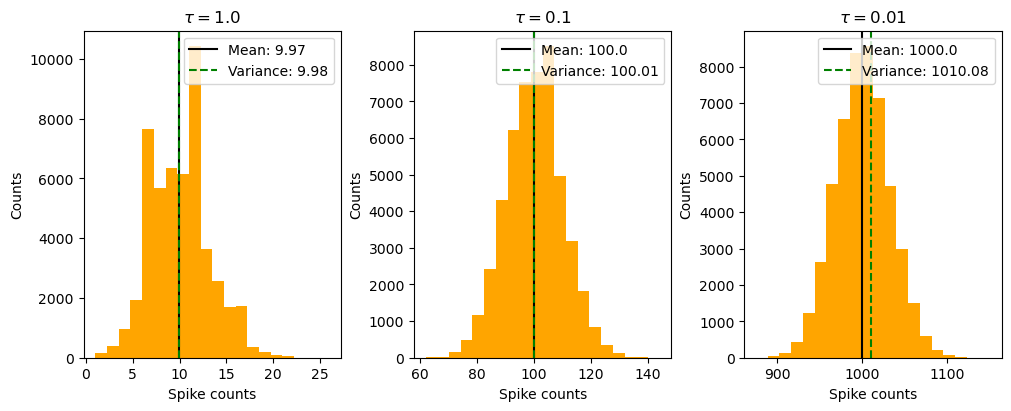

In [8]:
n_trials = 50_000

fig, axs = plt.subplots(ncols = len(taus), figsize = (10, 4), sharex = False, constrained_layout = True)
for tau, ax in zip(taus, axs):
    spike_times = poisson_spike_train(tau, length, n_trials)
    spike_counts = [len(spikes) for spikes in spike_times]

    mean = np.mean(spike_counts)
    var = np.var(spike_counts)

    ax.hist(spike_counts, color = "orange", bins = 20)
    ax.axvline(mean, label = f"Mean: {round(mean, 2)}", color = "black")
    ax.axvline(var, label = f"Variance: {round(var, 2)}", color = "green", ls = "--")
    ax.legend()
    ax.set_title(r"$\tau =$" + str(tau))
    ax.set_xlabel("Spike counts")
    ax.set_ylabel("Counts")
plt.show()

c) Draw 10.000 samples $x_k \in \{0, 1\}$ independently from a Beronulli distribution $P (x_k ) = \lambda^{x_k} (1 − \lambda)^{1−x_k}$ with $k = 1, \ldots , 10.000$ for the following three cases: $\lambda = 0.1$, $\lambda = 0.01$, $\lambda = 0.001$. Plot the random vector $x$ as a spike train for each of the three conditions.

In [9]:
def random_bernoulli(p):
    return np.random.binomial(n = 1, p = p)

In [10]:
def bernoulli_spike_train(p, n_samples, n_trials = 1):
    return [[random_bernoulli(p) for _ in range(n_samples)] for _ in range(n_trials)]

In [11]:
def spike_to_time(spikes, time_length):
    length = len(spikes) / time_length
    return np.where(np.array(spikes) == 1)[0] / length

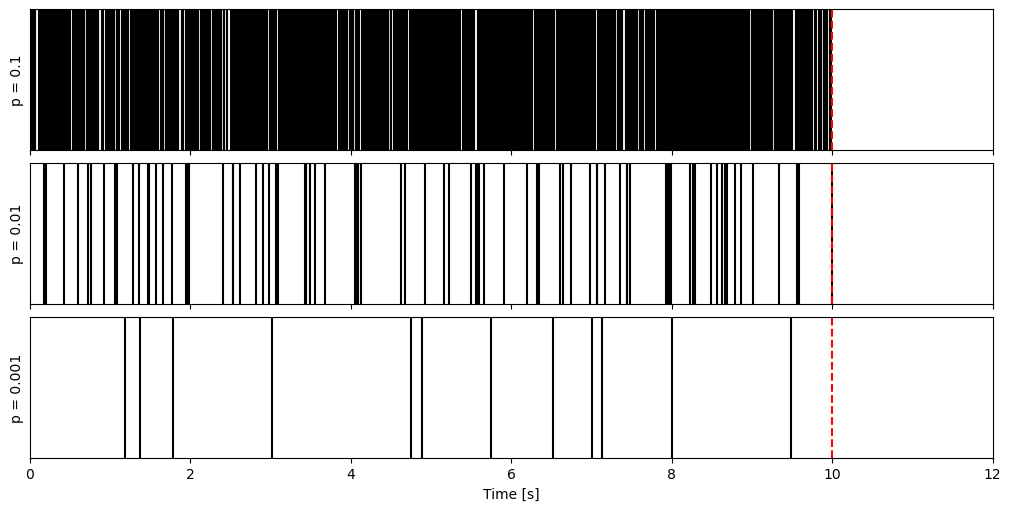

In [12]:
time_length = 10
n_samples = 10_000
ps = [0.1, 0.01, 0.001]

fig, axs = plt.subplots(nrows = len(ps), figsize = (10, 5), sharex = True, constrained_layout = True)
for p, ax in zip(ps, axs):
    spike_train = bernoulli_spike_train(p = p, n_samples = n_samples)
    spike_times = [spike_to_time(spikes, time_length = time_length) for spikes in spike_train]
    raster(spike_times, t_max = 12, ax = ax)
    ax.axvline(10, linestyle = "--", color = "r")
    ax.set_ylabel(r"p = " + str(p))
    ax.set_xlabel('')
axs[-1].set_xlabel("Time [s]")
plt.show()

d) Simulate 50.000 spike trains for each parameter in c) and compute the total number of spikes (i.e. the “spike count”) for each. Plot a histogram over the spike counts for each of the three conditions, as well as the mean and the variance.

How do the results differ from those b)?

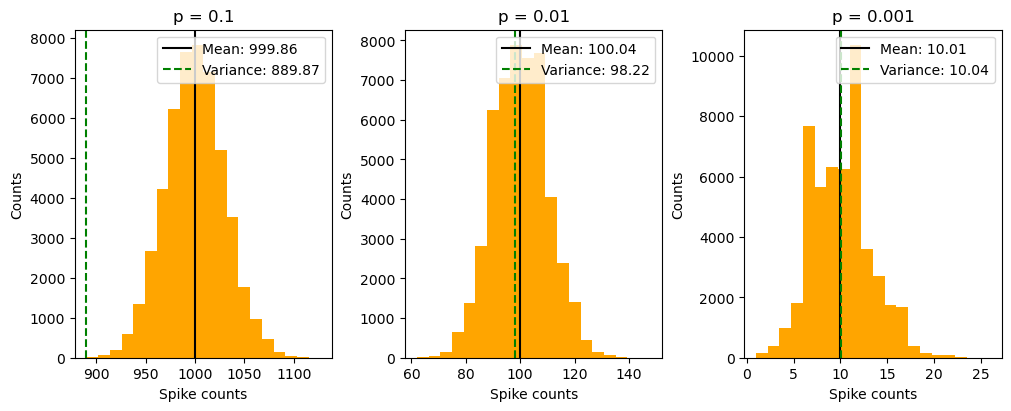

In [13]:
n_trials = 50_000
n_samples = 10_000
ps = [0.1, 0.01, 0.001]

fig, axs = plt.subplots(ncols = len(ps), figsize = (10, 4), sharex = False, constrained_layout = True)
for p, ax in zip(ps, axs):
    spike_trains = bernoulli_spike_train(p = p, n_samples = n_samples, n_trials = n_trials)
    spike_counts = [np.sum(spikes) for spikes in spike_trains]

    mean = np.mean(spike_counts)
    var = np.var(spike_counts)

    ax.hist(spike_counts, color = "orange", bins = 20)
    ax.axvline(mean, label = f"Mean: {round(mean, 2)}", color = "black")
    ax.axvline(var, label = f"Variance: {round(var, 2)}", color = "green", ls = "--")
    ax.legend()
    ax.set_title(f"p = {p}")
    ax.set_xlabel("Spike counts")
    ax.set_ylabel("Counts")
plt.show()

**Answer**

The Bernoulli and Poisson distributions generate almost the same spike train count distributions. Larger $\lambda$ values in the case of Bernoulli distribution correspond to smaller $\tau$ values in the case of Poisson distribution (e.g., the Bernoulli distributions with $\lambda = 0.1$ and $\lambda = 0.001$ generate similar spike trains as the Poisson distribution with $\tau = 0.01$ and $\tau = 1$, respectively).

The variance is smaller than the mean (especially in the case for $\lambda = 0.1$).

e*) The cases in which the distributions in b) and d) match and disagree with each other is related to the limit cases discussed in the lecture. Under which circumstance do the Binomial distribution and the Poisson distribution match each other? Under these assumptions, prove, by taking the limit, that the probability functions are the same. (up to 2 bonus points)

*Hint: Relate $\lambda$, $p$, and $n$ to each other. Take the appropriate limit* $$\lim_{\substack{? \to\infty \\ ?\to 0}}$$
*and show that $P_{Bernoulli}(X=s)$ in the limit is the same as $P_{Poisson}(X=s)$.*

**Answer**

Let $\lambda = pn$. Then:

$$
\begin{align}
\lim_{n \to\infty} {n \choose k} p^k (1 - p)^{n-k}
&= \lim_{n \to\infty} \frac{n(n-1)(n-2) \dots (n-k+1)}{k!} \left(\frac{\lambda}{n}\right)^k \left(1 - \frac{\lambda}{n}\right)^{n-k} \\
&= \lim_{n \to \infty} \frac{n^k}{k!} \frac{\lambda^k}{n^k} \left( 1 - \frac{\lambda}{n} \right)^n \left(1 - \frac{\lambda}{n} \right)^{-k} \\
&= \lim_{n \to \infty} \frac{\lambda^k}{k!} \left( 1 - \frac{\lambda}{n} \right)^n \\
&= \frac{\lambda^k e^{-\lambda}}{k!}
\end{align}
$$


2) Compute the mean and variance of the Poisson distribution with parameter $\lambda$ (first try yourself) (3 points)

**Answer**

\begin{equation*}
P(x = k) = \text{Poisson}(k \  ; \lambda) = \frac{\lambda^{k} \cdot e^{-\lambda}}{k\,!}
\end{equation*} \
Mean:
\begin{equation*}
\begin{split}
E(x) & = \sum_{x \in X}^{\infty} x P(X = x) = \\
&= \sum_{x = 0}^{\infty} x \frac{\lambda^x e^{-\lambda}}{x!} = \\
&= \sum_{x = 1}^{\infty} x \frac{\lambda^x e^{-\lambda}}{x!} = \\
&= e^{-\lambda} \sum_{x = 1}^{\infty} x \frac{\lambda^x}{x!} = \\
&= e^{-\lambda}\lambda \sum_{x = 1}^{\infty} \frac{\lambda^{x-1}}{(x - 1)!} = \\
&= e^{-\lambda} \lambda e^{\lambda} = \\
&= \lambda
\end{split}
\end{equation*}

Variance:
\begin{equation*}
\begin{split}
Var(x) & = E(x^2) - (E(x))^2 = \\
&= \lambda^2 + \lambda - \lambda^2 = \\
&= \lambda \\
\end{split}
\end{equation*}

\begin{equation*}
\begin{split}
E(x^2) & = \sum_{x \in X}^{\infty} x^2 P(X = x) = \\
&= \sum_{x = 0}^{\infty} x^2 \frac{\lambda^x e^{-\lambda}}{x!} \\
&= e^{-\lambda} \lambda \sum_{x = 1}^{\infty} x^2 \frac{\lambda^{x - 1}}{x!} \\
&= e^{-\lambda} \lambda \sum_{x = 1}^{\infty} x \frac{\lambda^{x - 1}}{(x - 1)!} \\
&= e^{-\lambda} \lambda \biggl( \sum_{x = 1}^{\infty} (x - 1) \frac{\lambda^{x - 1}}{(x - 1)!} + \sum_{x = 1}^{\infty} \frac{\lambda^{x - 1}}{(x - 1)!} \biggl) \\
&= e^{-\lambda} \lambda \biggl( \lambda \sum_{x = 2}^{\infty} \frac{\lambda^{x - 2}}{(x - 2)!} + \sum_{x = 1}^{\infty} \frac{\lambda^{x - 1}}{(x - 1)!} \biggl) \\
&= e^{-\lambda} \lambda (\lambda e^{\lambda} + e^{\lambda}) \\
&= e^{-\lambda} e^{\lambda} \lambda (\lambda + 1) \\
&= \lambda (\lambda + 1) \\
&= \lambda^2 + \lambda
\end{split}
\end{equation*}

3) Show that the sum of two independent Poisson random variables of parameters $\lambda$ and $\mu$ is again Poisson with
parameter $\lambda + \mu $. (2 points)

If $X \sim \text{Poisson}(\lambda) $ and $Y \sim \text{Poisson}(\mu)$, we have:
\begin{equation*}
\begin{split}
P(k = X + Y) & = \sum_{i=0}^{k} P(X = i, Y = k - i) \\
&= \sum_{i=0}^{k} P(X = i)P(Y = k - i) \\
&= \sum_{i = 0}^k \frac{\lambda^i e^{-\lambda}}{i!} \frac{\mu^{k-i} e^{-\mu}}{(k-i)!} \\
&= e^{-(\lambda + \mu)} \sum_{i = 0}^k \frac{\lambda^i}{i!} \frac{\mu^{k-i}}{(k-i)!} \\
&= \frac{e^{-(\lambda + \mu)}}{k!} \sum_{i = 0}^k \frac{k!}{i!(k - i)!} \lambda^i \mu^{k-i} \\
&= \frac{e^{-(\lambda + \mu)}}{k!} (\lambda + \mu)^k = \text{Poisson}(k \  ; \lambda + \mu)
\end{split}
\end{equation*}